## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(study_results, mouse_metadata, on='Mouse ID', how='inner')

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
unique_mice = len(pd.unique(combined_data['Mouse ID']))
print(f'Unique mice = {unique_mice}')

Unique mice = 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"]
dup_mice

861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = combined_data.copy()

clean_mice = clean_mice[clean_mice["Mouse ID"].isin(dup_mice)==False]

clean_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice2 = len(pd.unique(clean_mice['Mouse ID']))
print(f'Unique mice = {unique_mice2}')

Unique mice = 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Mean Tumor Volume
mean_tumor_vol = clean_mice.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
# Median Tumor Volume
med_tumor_vol = clean_mice.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
# Tumor Volume Variance
tum_vol_var = clean_mice.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
# Tumor Volume Std. Dev.
tum_vol_std_dev = clean_mice.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
# Tumor Volume Std. Err.
tum_vol_std_err = clean_mice.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Mean Tumor Volume" : mean_tumor_vol, "Median Tumor Volume" : med_tumor_vol, "Tumor Volume Variance" : tum_vol_var, "Tumor Volume Std. Dev." : tum_vol_std_dev, "Tumor Volume Std. Err." : tum_vol_std_err})

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_mice.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

summary_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
clean_mice.sample(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
678,z795,20,53.280657,1,Naftisol,Female,13,29
1859,i557,5,42.261665,0,Capomulin,Female,1,24
173,a818,10,49.790919,0,Naftisol,Female,12,28
1649,t573,0,45.000000,0,Ceftamin,Female,15,27
1123,q787,40,62.034127,3,Placebo,Male,17,27


Text(0, 0.5, 'Number of Unique Mice')

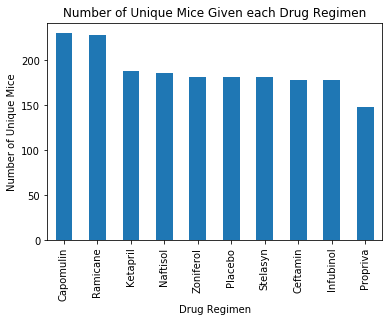

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# clean_mice = dataframe
reg_count = clean_mice['Drug Regimen'].value_counts()

reg_count.plot(kind='bar', title='Number of Unique Mice Given each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice')

In [12]:
reg_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

In [13]:
reg_count.index.values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype=object)

In [14]:
reg_count.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148])

Text(0, 0.5, 'Number of Unique Mice')

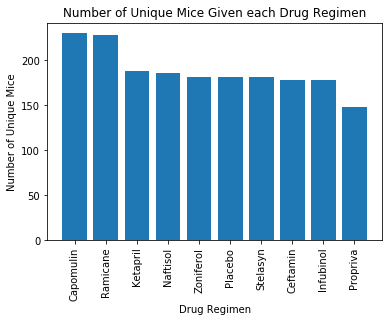

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(reg_count.index.values,reg_count.values)
plt.xticks(rotation=90)
plt.title('Number of Unique Mice Given each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice')

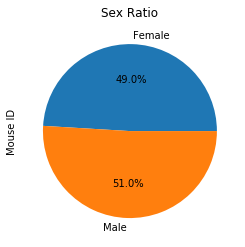

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# value counts for sex column
# sex_count = clean_mice.groupby(['Sex'])['Mouse ID']
# sex_count.plot(kind='pie', y='Mouse ID', autopct='%1.1f%%')
# title=('Title')

# values_df = pyma_df.groupby('Sex').nunique(['Mouse ID'])
# values_df.plot(kind='pie', y = 'Mouse ID', autopct="%1.1f%%")
# plt.title("Mice by Sex")

sex_grouped = clean_mice.groupby(["Sex"])["Mouse ID"].count()

sex_grouped.plot(kind="pie", autopct='%1.1f%%')
plt.title("Sex Ratio")
plt.show()

Text(0.5, 1.0, 'Mice by Sex')

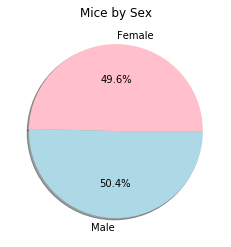

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = clean_mice['Sex'].unique()
values_df = clean_mice.groupby('Sex').nunique(['Mouse ID'])
values = values_df['Mouse ID']
colors = ["pink","lightblue"]
plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Mice by Sex")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max_tp = clean_mice.groupby("Mouse ID").max()["Timepoint"]
mouse_max_tp

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_data_max_tp = pd.merge(clean_mice, mouse_max_tp, on=['Mouse ID','Timepoint'], how='right')
combined_data_max_tp

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list_4 = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatment_list_4: 
    volume = combined_data_max_tp.loc[combined_data_max_tp["Drug Regimen"]==drugs]["Tumor Volume (mm3)"]
    tumor_vol_data.append(volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    low_bound = lowerq - (1.5*iqr)
    up_bound = upperq + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drugs} are {outliers}.")

The outliers for Infubinol are 29    36.321346
Name: Tumor Volume (mm3), dtype: float64.


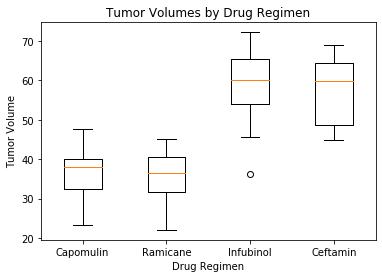

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data,labels=treatment_list_4)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes by Drug Regimen")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

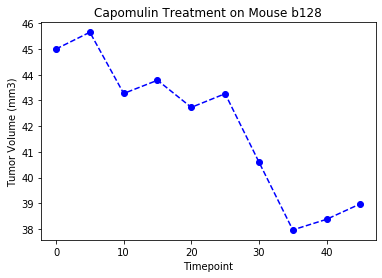

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#mouse b128
mouse_b128 = clean_mice.loc[clean_mice['Mouse ID'] == 'b128']
mouse_b128

plt.plot(mouse_b128.iloc[:,1],mouse_b128.iloc[:,2], marker='o', linestyle='dashed', color='blue')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment on Mouse b128')
plt.show

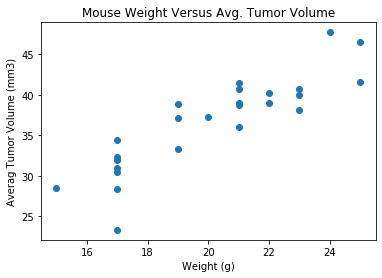

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = combined_data_max_tp.loc[combined_data_max_tp['Drug Regimen'] == 'Capomulin']
plt.scatter(capomulin_df.iloc[:,7], capomulin_df.iloc[:,2])
plt.title('Mouse Weight Versus Avg. Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.savefig('Scatter chart')

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_df.iloc[:,7], capomulin_df.iloc[:,2])
print(f"The correlation for mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation for mouse weight and the average tumor volume is 0.88


The r-squared is: 0.7686134812139


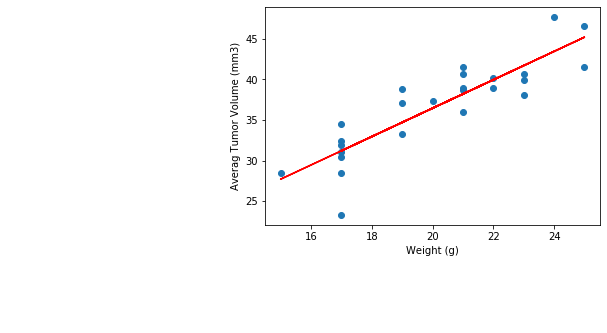

In [25]:
x_values = capomulin_df.iloc[:,7]
y_values = capomulin_df.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()